# **Tiền xử lý dữ liệu**





In [1]:
# Khai báo thư viện
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Đọc dữ liệu và lưu dữ liệu vào dataframe
df = pd.read_csv("heart_2020_cleaned.csv")
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
# Hiển thị thông tin về dữ liệu
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# Mô tả dữ liệu
df.describe() 

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
# Tính trung vị các thuộc tính
from scipy.stats import mode
data1=df['BMI']
data2=df['PhysicalHealth']
data3=df['MentalHealth']
data4=df['SleepTime']

result1 = mode(data1, keepdims = True)
result2 = mode(data2, keepdims = True)
result3 = mode(data3, keepdims = True)
result4 = mode(data4, keepdims = True) # keepdims kiểm soát việc duy trì kích thước của các chiều sau khi thực hiện 1 phép toán trên mảng

print("Mode BMI: ",result1.mode)
print("Mode PhysicalHealth: ",result2.mode)
print("Mode MentalHealth: ",result3.mode)
print("Mode SleepTime: ",result4.mode)

Mode BMI:  [26.63]
Mode PhysicalHealth:  [0.]
Mode MentalHealth:  [0.]
Mode SleepTime:  [7.]


In [6]:
# Kiểm tra và xóa dữ liệu bị trùng lặp
df.drop_duplicates(inplace=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [7]:
# Kiểm tra dữ liệu khuyết thiếu
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
# Xóa dữ liệu khuyết thiếu
df.dropna(inplace=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [9]:
# Tìm kiếm và xử lí dữ liệu ngoại lai
def detect_outlier(col):
    IQR = df[col].quantile(.75) - df[col].quantile(.25)
    max_whiskers = df[col].quantile(.75) + (IQR*1.5)
    min_whiskers = df[col].quantile(.25) - (IQR*1.5)
    return df[(df[col]<max_whiskers) & (df[col]>min_whiskers)]

In [10]:
# Xử lí dữ liệu ngoại lai
df = detect_outlier('BMI')
df = detect_outlier('PhysicalHealth')
df = detect_outlier('MentalHealth')
df = detect_outlier('SleepTime')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No
11,No,28.71,Yes,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,5.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No


<Axes: xlabel='SleepTime'>

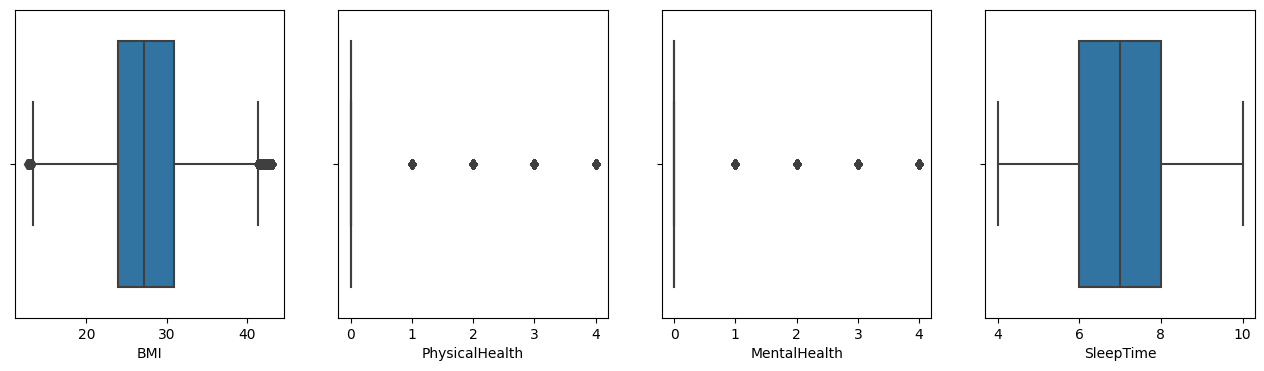

In [11]:
# Vẽ biểu đồ box plot cho các thuộc tính
fg, ax = plt.subplots(1, 4, figsize = (16,4))
sns.boxplot(x=df['BMI'],ax=ax[0])
sns.boxplot(x=df['PhysicalHealth'],ax=ax[1])
sns.boxplot(x=df['MentalHealth'],ax=ax[2])
sns.boxplot(x=df['SleepTime'],ax=ax[3])

<Axes: xlabel='HeartDisease', ylabel='count'>

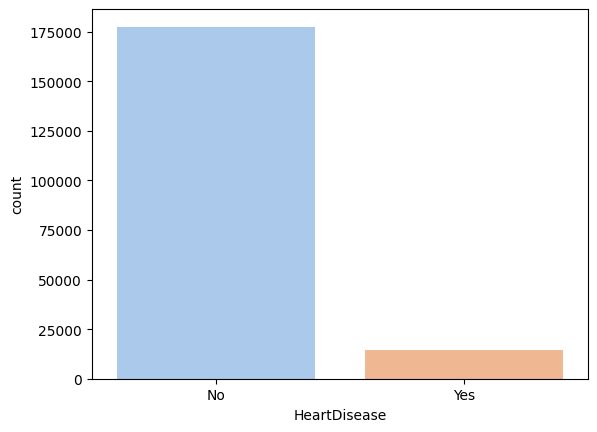

In [12]:
# Kiểm tra tính cân đối của dữ liệu mục tiêu
sns.countplot(x='HeartDisease',data=df,palette='pastel')

### Vậy dữ liệu mục tiêu bị mất cân đối và cần xử lý

(354870, 18)


<Axes: xlabel='HeartDisease', ylabel='count'>

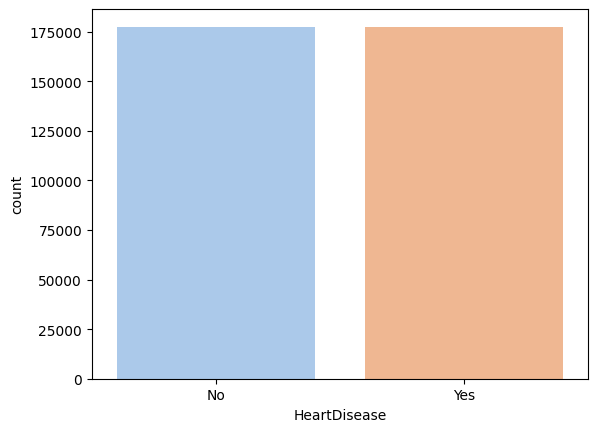

In [13]:
# Sử dụng Random Over Sampler
# Khai báo thư viện RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
# Tiến hành xử lý
features = df.drop(columns =['HeartDisease'], axis = 1)
target = df['HeartDisease']

oversample = RandomOverSampler(sampling_strategy='minority')
x_resampled, y_resampled = oversample.fit_resample(features, target)

cols =['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory','Race' , 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease']

data = pd.DataFrame(np.column_stack((x_resampled, y_resampled)), columns=cols)

print(data.shape)

data['HeartDisease'].value_counts()

sns.countplot(x='HeartDisease',data=data,palette='pastel')

In [14]:
df1 = data.copy()
# Mã hóa dữ liệu với LabelEncoder
# Khai báo thư viện
from sklearn.preprocessing import LabelEncoder
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)
df1

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,459,0,0,1,0,0,0,0,12,5,0,1,4,3,0,0,0,0
1,812,0,0,0,0,0,0,0,11,5,0,0,2,2,0,0,1,0
2,1014,0,0,0,0,0,0,0,12,5,1,0,1,1,0,1,0,0
3,2157,0,0,0,0,0,1,1,9,5,0,1,2,6,0,0,0,0
4,1212,1,0,0,0,0,0,0,7,5,0,1,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354865,1382,1,0,1,0,0,0,1,11,5,2,1,4,5,1,0,1,1
354866,561,1,0,0,0,0,0,0,11,5,0,1,0,3,0,0,0,1
354867,1337,1,0,0,3,0,0,1,5,3,0,0,2,2,0,0,0,1
354868,707,0,0,0,0,0,0,0,12,5,0,1,2,2,0,0,0,1


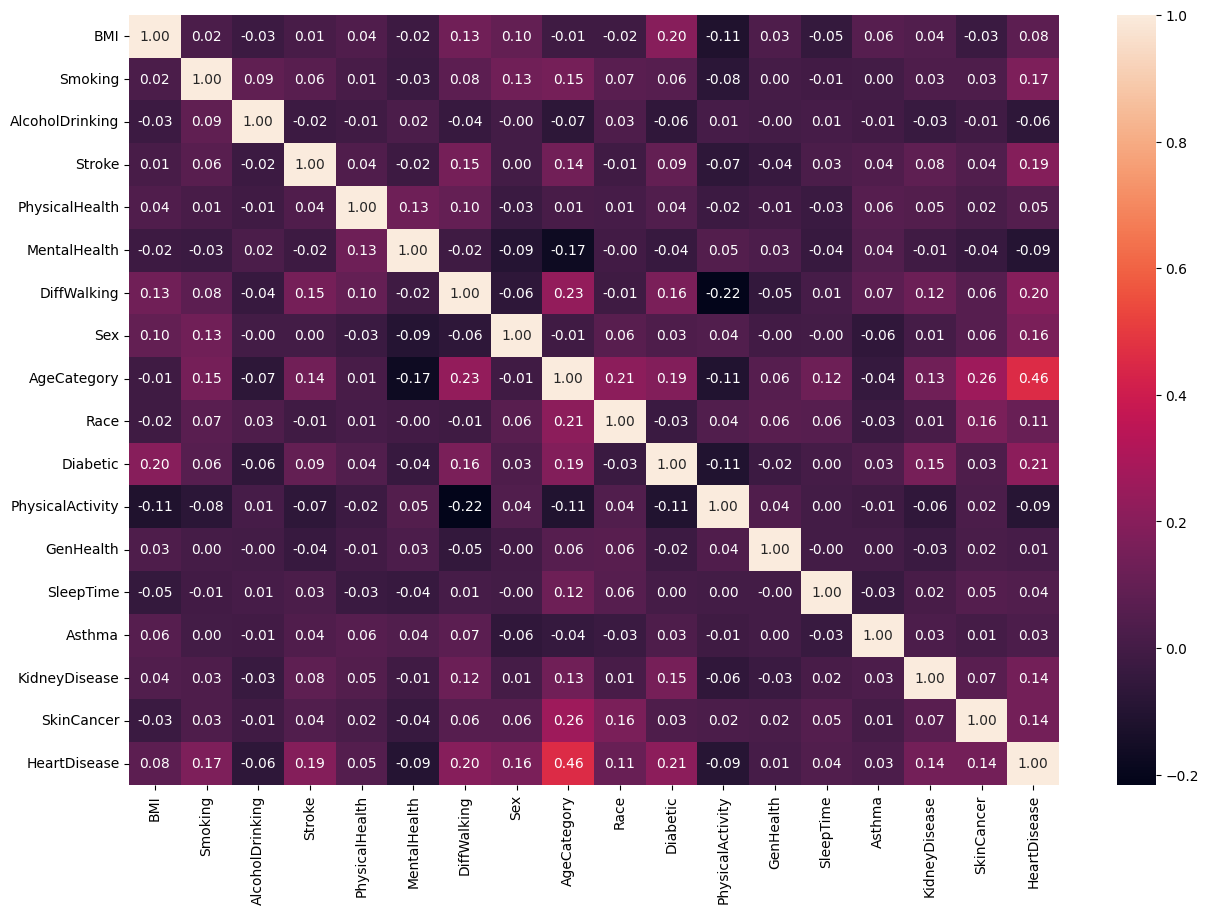

In [15]:
# Biểu đồ tương quan giữa các thuộc tính
plt.figure(figsize= (15,10))
sns.heatmap(df1.corr(), annot = True ,fmt='0.2f')
plt.show()

array([<Axes: title={'center': 'SleepTime'}>], dtype=object)

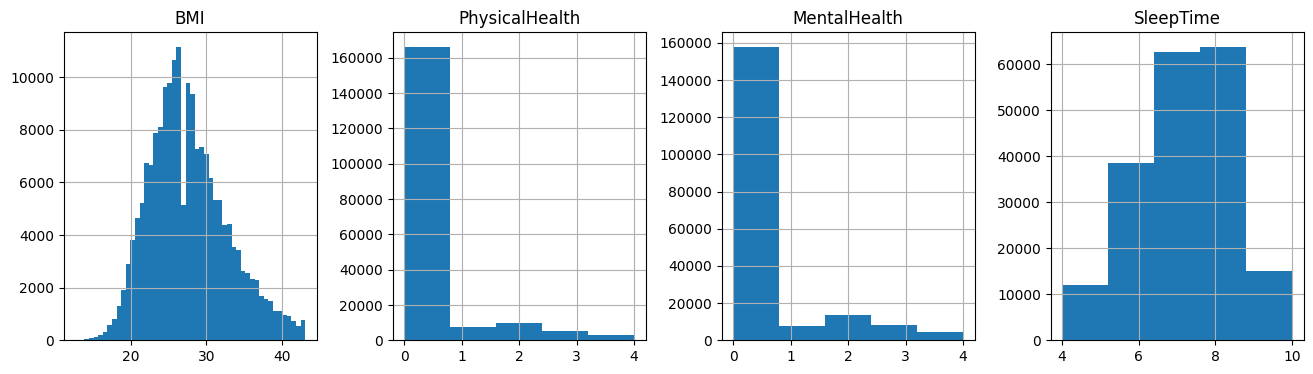

In [16]:
# Biểu đồ mô tả sự phân bổ của các dữ liệu định lượng
fg,ax = plt.subplots(1,4,figsize=(16,4))
df[["BMI"]].hist(bins=50, figsize=(15,10),ax=ax[0]);
df[["PhysicalHealth"]].hist(bins=5, figsize=(15,10),ax=ax[1]);
df[["MentalHealth"]].hist(bins=5, figsize=(15,10),ax=ax[2]);
df[["SleepTime"]].hist(bins=5, figsize=(15,10),ax=ax[3])

In [17]:
# Hàm tính các chỉ số độ đo của mô hình phân lớp
def evaluate_model(model, Xtest, Ytest):
    from sklearn import metrics

    # Dự đoán trên tập test 
    y_pred = model.predict(Xtest)

    # Tính các độ đo accuracy, precision, recall, f1-score
    acc = metrics.accuracy_score(Ytest, y_pred)
    prec = metrics.precision_score(Ytest, y_pred)
    rec = metrics.recall_score(Ytest, y_pred)
    f1 = metrics.f1_score(Ytest, y_pred)

    # Hiển thị ma trận nhầm lẫn
    cm = metrics.confusion_matrix(Ytest, y_pred)

    # Hiển thị classification report
    result = classification_report(Ytest, y_pred)

    return {'y_pred': y_pred, 'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 
              'cm': cm, 'result': result}

In [18]:
# Tiến hành chia bộ dữ liệu ra 2 tập train và test
from sklearn.model_selection import train_test_split
x = df1.drop(["HeartDisease"] , axis = 1).values
y = df1["HeartDisease"].values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25, random_state=42)

### Triển khai thuật toán Random Forest Classifier

In [19]:
# Khai báo thư viện Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,
                            random_state=0)
# Huấn luyện dữ liệu tập train
rfc.fit(Xtrain,Ytrain)

RandomForestClassifier(random_state=0)

In [20]:
# Đánh giá các độ đo của mô hình Random Forest
clf_eval = evaluate_model(rfc, Xtest, Ytest)
# In ra kết quả
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Confusion Matrix:\n', clf_eval['cm'])
print('Classification Report:\n', clf_eval['result'])

Accuracy: 0.9655763204761153
Precision: 0.9354784188621047
Recall: 1.0
F1 Score: 0.9666637558398463
Confusion Matrix:
 [[41385  3054]
 [    0 44279]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     44439
           1       0.94      1.00      0.97     44279

    accuracy                           0.97     88718
   macro avg       0.97      0.97      0.97     88718
weighted avg       0.97      0.97      0.97     88718



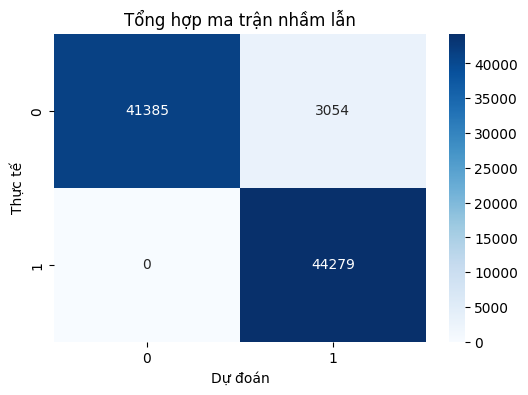

In [21]:
# Biểu đồ ma trận nhầm lẫn
# Tính toán ma trận nhầm lẫn
conf_matrix = confusion_matrix(Ytest, clf_eval['y_pred'])

# Tạo biểu đồ
plt.figure(figsize=(6, 4))
plt.title('Tổng hợp ma trận nhầm lẫn')
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

### Triển khai thuật toán K-Neareast Neighbors

In [22]:
df2 = data.copy()
df2

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,No
1,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,No
2,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No,No
3,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No,No
4,28.71,Yes,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,5.0,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354865,30.67,Yes,No,Yes,0.0,0.0,No,Male,75-79,White,Yes,Yes,Very good,9.0,Yes,No,Yes,Yes
354866,21.48,Yes,No,No,0.0,0.0,No,Female,75-79,White,No,Yes,Excellent,7.0,No,No,No,Yes
354867,30.13,Yes,No,No,3.0,0.0,No,Male,45-49,Hispanic,No,No,Good,6.0,No,No,No,Yes
354868,23.05,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Good,6.0,No,No,No,Yes


In [23]:
df2[cols] = df2[cols].apply(LabelEncoder().fit_transform)
df2

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,459,0,0,1,0,0,0,0,12,5,0,1,4,3,0,0,0,0
1,812,0,0,0,0,0,0,0,11,5,0,0,2,2,0,0,1,0
2,1014,0,0,0,0,0,0,0,12,5,1,0,1,1,0,1,0,0
3,2157,0,0,0,0,0,1,1,9,5,0,1,2,6,0,0,0,0
4,1212,1,0,0,0,0,0,0,7,5,0,1,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354865,1382,1,0,1,0,0,0,1,11,5,2,1,4,5,1,0,1,1
354866,561,1,0,0,0,0,0,0,11,5,0,1,0,3,0,0,0,1
354867,1337,1,0,0,3,0,0,1,5,3,0,0,2,2,0,0,0,1
354868,707,0,0,0,0,0,0,0,12,5,0,1,2,2,0,0,0,1


In [24]:
# Tiến hành chia bộ dữ liệu ra 2 tập train và test
from sklearn.model_selection import train_test_split
X = df2.drop(["HeartDisease"] , axis = 1).values
Y = df2["HeartDisease"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [25]:
# Chuẩn hóa các dữ liệu phụ thuộc
# Khai báo thư viện StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Chuẩn hóa dữ liệu tập train
X_train = scaler.fit_transform(X_train)

# Chuẩn hóa dữ liệu tập test
X_test = scaler.fit_transform(X_test)

In [26]:
# Khai báo thư viện K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

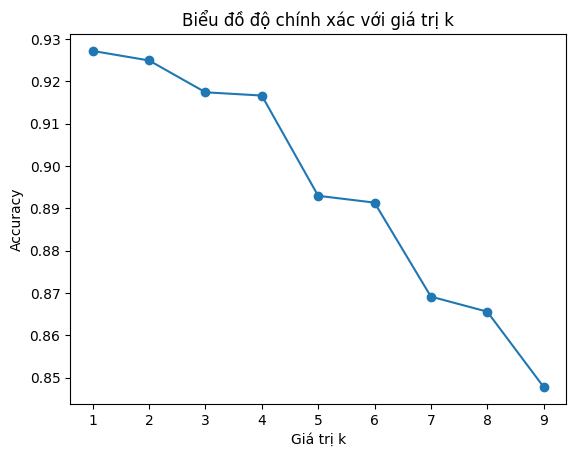

In [27]:
# Khởi tạo các giá trị k bạn muốn thử nghiệm
k_values = range(1, 10)  # Có thể điều chỉnh khoảng giá trị k tùy ý

# Khởi tạo danh sách để lưu kết quả đánh giá hiệu suất
accuracy_values = []

# Thử nghiệm với mỗi giá trị k
for k in k_values:
    # Khởi tạo mô hình KNN với giá trị k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Huấn luyện mô hình trên tập train
    knn.fit(X_train, Y_train)
    
    # Đánh giá hiệu suất trên tập test
    accuracy = knn.score(X_test, Y_test)
    
    # Lưu kết quả vào danh sách
    accuracy_values.append(accuracy)

# Vẽ biểu đồ độ chính xác với giá trị k
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Biểu đồ độ chính xác với giá trị k')
plt.xlabel('Giá trị k')
plt.ylabel('Accuracy')
plt.show()

In [28]:
# Huấn luyện dữ liệu tập train với k = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
# Đánh giá mô hình
knn_eval = evaluate_model(knn, X_test, Y_test)

# In ra kết quả
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Confusion Matrix:\n', knn_eval['cm'])
print('Classification Report:\n', knn_eval['result'])

Accuracy: 0.9271850131878536
Precision: 0.9120345150676574
Recall: 0.9452788003342443
F1 Score: 0.9283591358736637
Confusion Matrix:
 [[40402  4037]
 [ 2423 41856]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93     44439
           1       0.91      0.95      0.93     44279

    accuracy                           0.93     88718
   macro avg       0.93      0.93      0.93     88718
weighted avg       0.93      0.93      0.93     88718



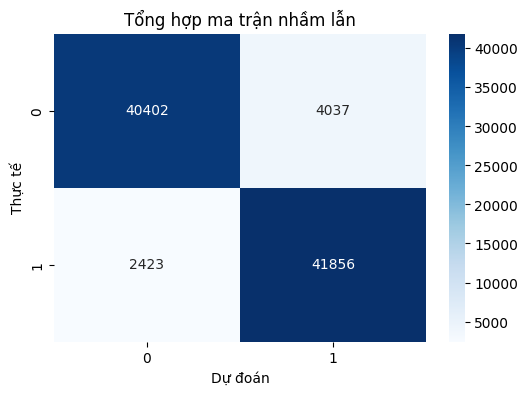

In [30]:
# Biểu đồ ma trận nhầm lẫn
# Tính toán ma trận nhầm lẫn
conf_matrix = confusion_matrix(Ytest, knn_eval['y_pred'])

# Tạo biểu đồ
plt.figure(figsize=(6, 4))
plt.title('Tổng hợp ma trận nhầm lẫn')
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

### Triển khai thuật toán Navie Bayes

In [31]:
# Triển khai thuật toán Navie Bayes trên tập df3
df3 = data.copy()
df3

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,No
1,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,No
2,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No,No
3,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No,No
4,28.71,Yes,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,5.0,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354865,30.67,Yes,No,Yes,0.0,0.0,No,Male,75-79,White,Yes,Yes,Very good,9.0,Yes,No,Yes,Yes
354866,21.48,Yes,No,No,0.0,0.0,No,Female,75-79,White,No,Yes,Excellent,7.0,No,No,No,Yes
354867,30.13,Yes,No,No,3.0,0.0,No,Male,45-49,Hispanic,No,No,Good,6.0,No,No,No,Yes
354868,23.05,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Good,6.0,No,No,No,Yes


In [32]:
# Mã hóa các thuộc tính về 0 và 1
df3['AgeOlder40']=df2['AgeCategory']
df3['AgeOlder40'].replace({'18-24':0,'25-29':0,'30-34':0,'35-39':0,'40-44':1,'45-49':1,'50-54':1,'55-59':1,'60-64':1,'65-69':1,'70-74':1,'75-79':1,'80 or older':1},inplace=True)
df3['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)
df3['Smoking'].replace({'Yes':1,'No':0},inplace=True)
df3['AlcoholDrinking'].replace({'Yes':1,'No':0},inplace=True)
df3['Stroke'].replace({'Yes':1,'No':0},inplace=True)
df3['DiffWalking'].replace({'Yes':1,'No':0},inplace=True)
df3['Sex'].replace({'Male':1,'Female':0},inplace=True)
df3['Diabetic'].replace({'Yes':1,'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1},inplace=True)
df3['PhysicalActivity'].replace({'Yes':1,'No':0},inplace=True)
df3['Asthma'].replace({'Yes':1,'No':0},inplace=True)
df3['KidneyDisease'].replace({'Yes':1,'No':0},inplace=True)
df3['SkinCancer'].replace({'Yes':1,'No':0},inplace=True)

In [33]:
df3.drop(columns=['AgeCategory','Race','GenHealth','MentalHealth','PhysicalHealth','BMI','SleepTime'],axis=1,inplace=True)
df3

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease,AgeOlder40
0,0,0,1,0,0,0,1,0,0,0,0,12
1,0,0,0,0,0,0,0,0,0,1,0,11
2,0,0,0,0,0,0,0,0,1,0,0,12
3,0,0,0,1,1,0,1,0,0,0,0,9
4,1,0,0,0,0,0,1,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
354865,1,0,1,0,1,1,1,1,0,1,1,11
354866,1,0,0,0,0,0,1,0,0,0,1,11
354867,1,0,0,0,1,0,0,0,0,0,1,5
354868,0,0,0,0,0,0,1,0,0,0,1,12


In [34]:
# Chia dữ liệu mục tiêu và dữ liệu phụ thuộc
z = df3.pop('HeartDisease')
T = df3

In [35]:
# Chia dữ liệu thành 2 tập train và test
T_train,T_test,z_train,z_test= train_test_split(T,z,test_size=0.25,random_state=0)

In [36]:
# Khai báo thư viện Bernoulli (một trong 3 mô hình của phương pháp Navie Bayes)
from sklearn.naive_bayes import BernoulliNB
nbModel=BernoulliNB()

In [37]:
# Huấn luyện dữ liệu với tập train
nbModel.fit(T_train,z_train)

BernoulliNB()

In [38]:
# Đánh giá mô hình
nb_eval = evaluate_model(nbModel, T_test, z_test)

# In ra kết quả
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Confusion Matrix:\n', nb_eval['cm'])
print('Classification Report:\n', nb_eval['result'])

Accuracy: 0.673549899682139
Precision: 0.7091389852916873
Recall: 0.583174775754281
F1 Score: 0.64001789842643
Confusion Matrix:
 [[34010 10560]
 [18402 25746]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70     44570
           1       0.71      0.58      0.64     44148

    accuracy                           0.67     88718
   macro avg       0.68      0.67      0.67     88718
weighted avg       0.68      0.67      0.67     88718



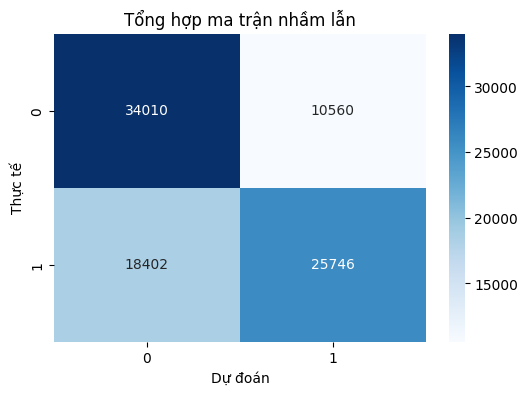

In [39]:
# Biểu đồ ma trận nhầm lẫn
# Tính toán ma trận nhầm lẫn
conf_matrix = confusion_matrix(z_test, nb_eval['y_pred'])

# Tạo biểu đồ
plt.figure(figsize=(6, 4))
plt.title('Tổng hợp ma trận nhầm lẫn')
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

### So sánh kết quả của 3 thuật toán trên

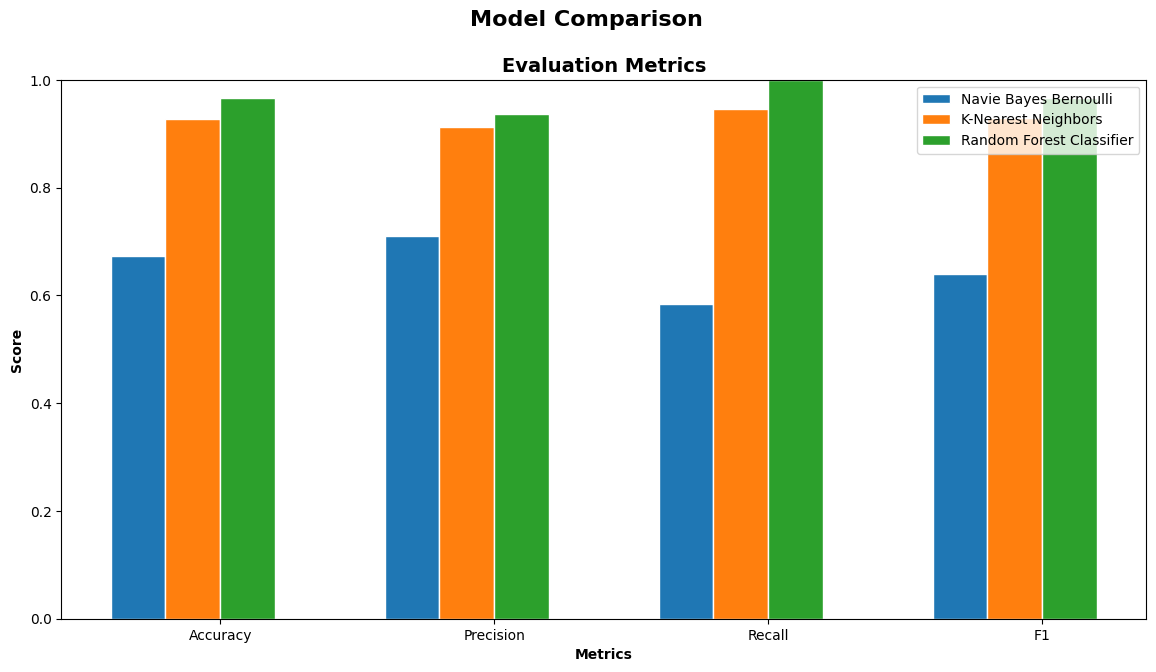

In [40]:
# So sánh kết quả độ đo của 3 phương pháp
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# Cài đặt kích thước cột
barWidth = 0.2
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1']]

# Cài đặt vị trí cột trên trục X
r1 = np.arange(len(nb_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Tạo các cột
ax1.bar(r1, nb_score, width=barWidth, edgecolor='white', label='Navie Bayes Bernoulli')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r3,clf_score, width=barWidth, edgecolor='white', label='Random Forest Classifier')

# Biểu diễn các trục X và Y
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(nb_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

# Tạo tiêu đề và gán nhãn mô tả
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend(loc="best")


plt.show()